<a href="https://colab.research.google.com/github/zcesclc/IndEx_17087024/blob/master/Concrete%20strength%20machine%20learning%20case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete strength prediction case study in python

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import time
warnings.filterwarnings('ignore')

In [ ]:
#read the file (add a 'r' before the address if its not reading)
ConcreteStrengthData=pd.read_csv(r'C:\Users\cherrychan9898\Downloads\ConcreteStrengthData.csv')
print('Shape before deleting duplicate values:', ConcreteStrengthData.shape)

Shape before deleting duplicate values: (1030, 9)


In [ ]:
#remove duplicate data
ConcreteStrengthData=ConcreteStrengthData.drop_duplicates()
print('Shape After deleting duplicate values:', ConcreteStrengthData.shape)

#print the first 10 rows in the sample data
print (ConcreteStrengthData.head(10))

Shape After deleting duplicate values: (1005, 9)
   CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   
5             266.0             114.0              0.0           228.0   
6             380.0              95.0              0.0           228.0   
7             380.0              95.0              0.0           228.0   
8             266.0             114.0              0.0           228.0   
9             475.0               0.0              0.0           228.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                   

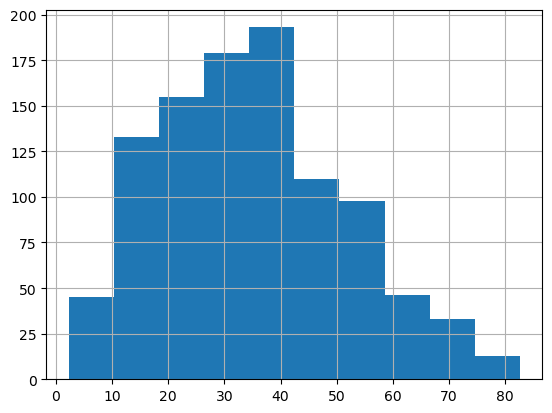

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB
None
       CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count       1005.000000       1005.000000      1005.000000     1005.000000   
mean         278.631343         72.043483        55.536318      18

In [ ]:
#create a supervised ML model to predict concrete strength with variables of water, cement, FA, fine aggre, age)
#first check how skewed the distribution is
hist = ConcreteStrengthData['Strength'].hist()
plt.show()
print(ConcreteStrengthData.info()) #print some info (data types) about the data
print(ConcreteStrengthData.describe()) #describe the data in count, mean, std, min, max etc.

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64


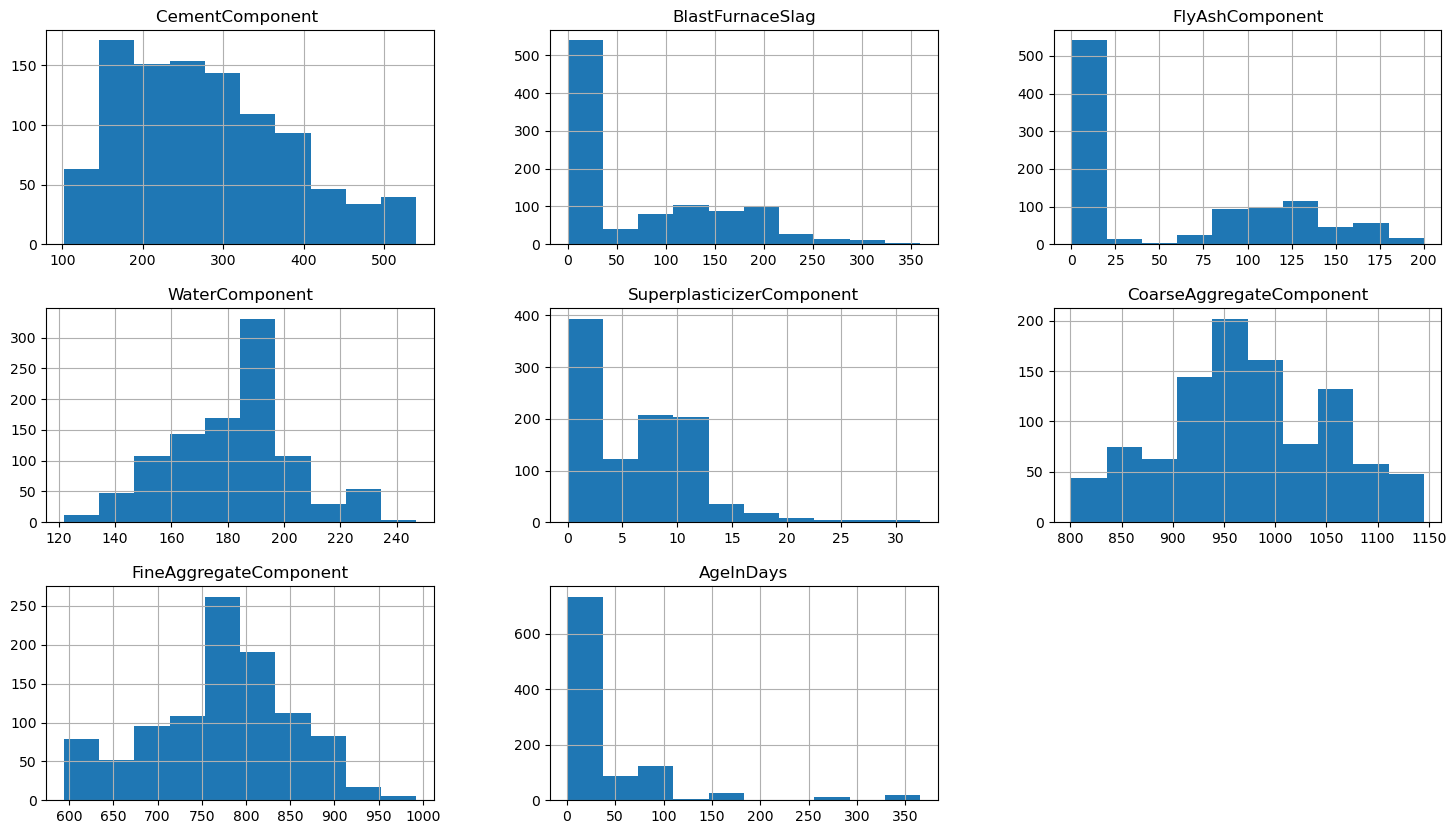

In [ ]:
#finding unique values in each column
#'Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous'
print(ConcreteStrengthData.nunique())

#plot all data distribution together in one graph and check the skewness
ConcreteStrengthData.hist(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent','WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'], figsize=(18,10))
plt.show()

PAY ATTENTION TO THE OUTLIERS (explore later...)

In [ ]:
#DEAL WITH THE MISSING VALUES (more than 30% should not be acceptable; will have to dump it)
print(ConcreteStrengthData.isnull().sum())

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64


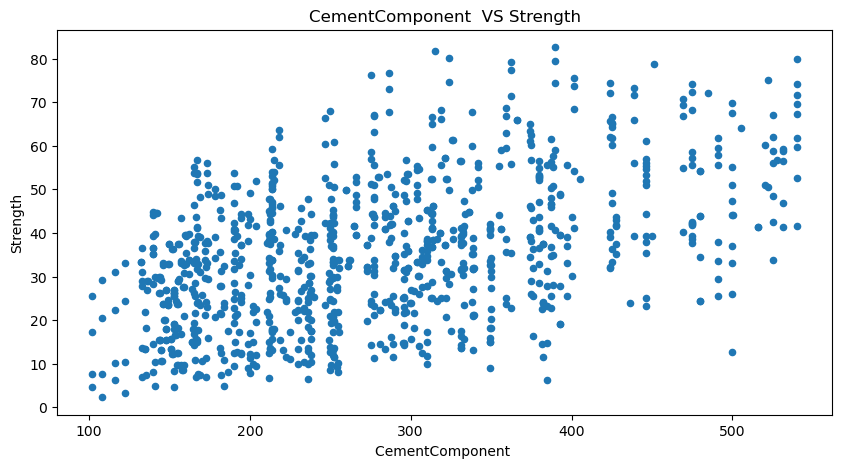

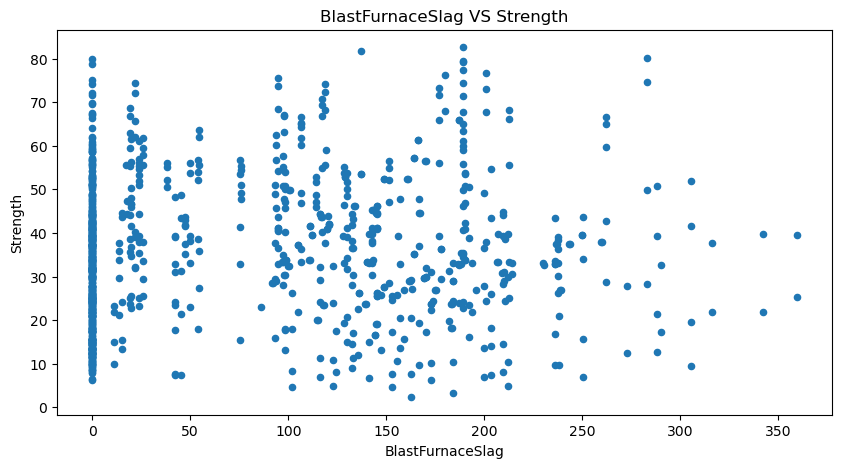

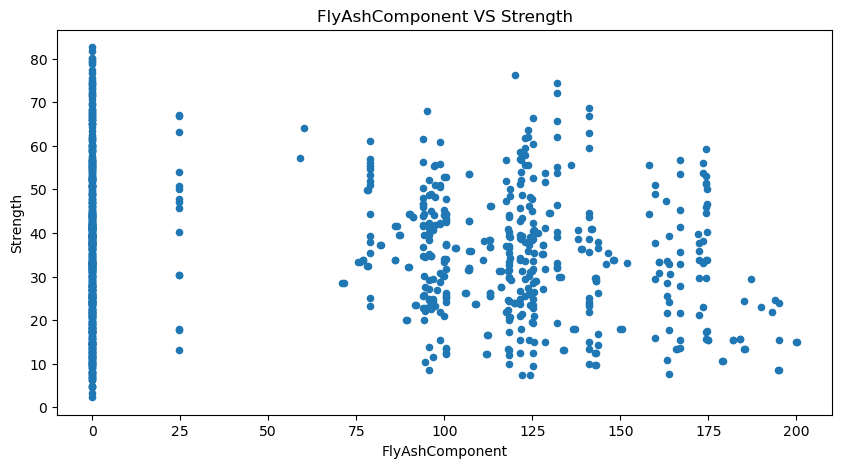

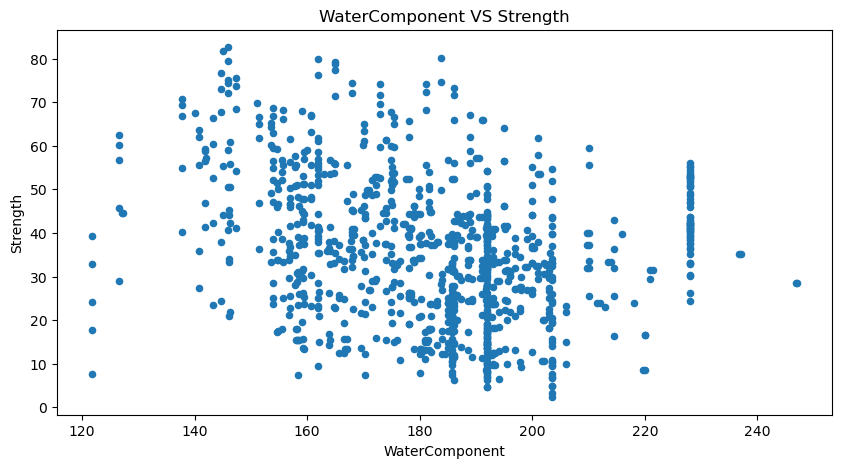

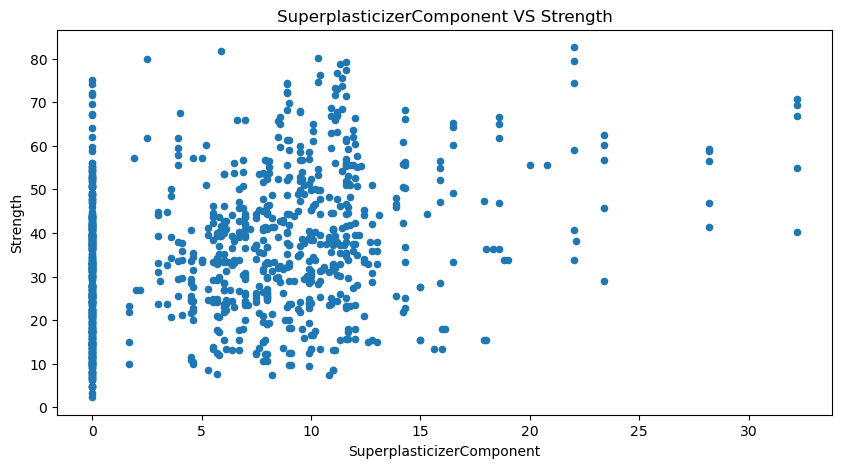

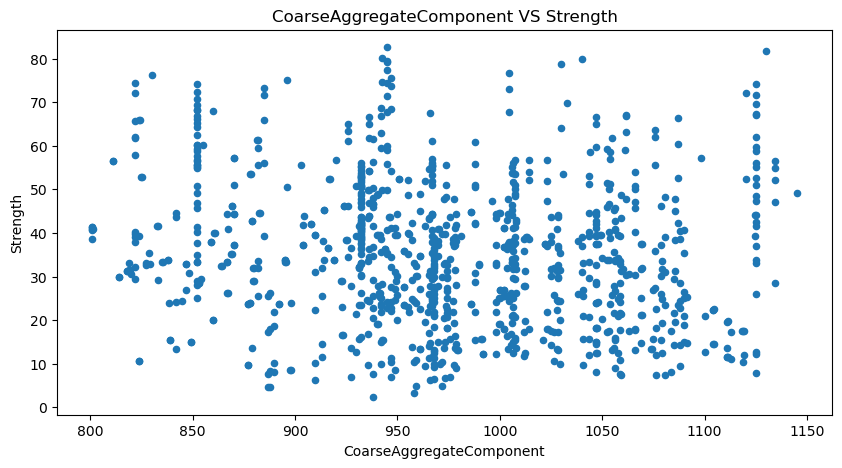

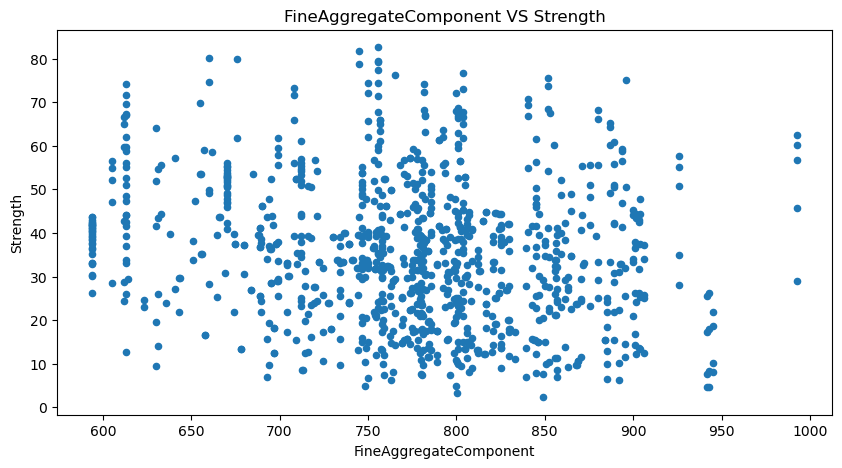

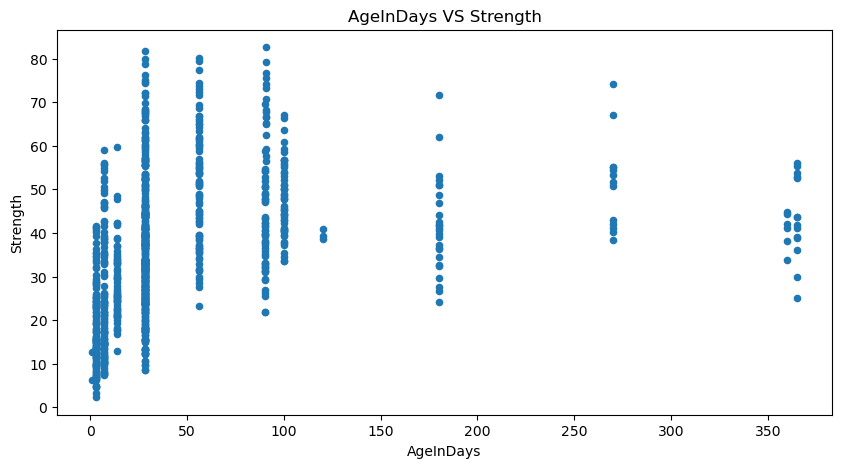

In [ ]:
ContinuousCols=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent','WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent', 'AgeInDays']
#plot the graphs of variables vs strength to see the trends (increase, decrease, or no)

for element in ContinuousCols:
    ConcreteStrengthData.plot.scatter(x=element, y='Strength', figsize=(10,5),title=element+' VS '+'Strength')
plt.show()

In [ ]:
#calculate rxy to see the correlation between columns
CorrelateCols=['Strength','CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']
CorrelationData=ConcreteStrengthData[CorrelateCols].corr()
print (CorrelationData)

                           Strength  CementComponent   BlastFurnaceSlag  \
Strength                   1.000000          0.488283          0.103374   
CementComponent            0.488283          1.000000         -0.303324   
BlastFurnaceSlag           0.103374         -0.303324          1.000000   
FlyAshComponent           -0.080648         -0.385610         -0.312352   
WaterComponent            -0.269624         -0.056625          0.130262   
SuperplasticizerComponent  0.344209          0.060906          0.019800   
CoarseAggregateComponent  -0.144717         -0.086205         -0.277559   
FineAggregateComponent    -0.186448         -0.245375         -0.289685   
AgeInDays                  0.337367          0.086348         -0.042759   

                           FlyAshComponent  WaterComponent  \
Strength                         -0.080648       -0.269624   
CementComponent                  -0.385610       -0.056625   
BlastFurnaceSlag                 -0.312352        0.130262   
F

In [ ]:
#if the correlation value (with strength) is >0.5, it shows a good relationship
#try 0.3 this time > select the 'strength' in CorrelationData then 
print(CorrelationData['Strength'][abs(CorrelationData['Strength']) > 0.3])

Strength                     1.000000
CementComponent              0.488283
SuperplasticizerComponent    0.344209
AgeInDays                    0.337367
Name: Strength, dtype: float64


In [ ]:
#select the  columns with correlation value > 0.3
SelectedCols=['CementComponent ','SuperplasticizerComponent','AgeInDays']
DataForML=ConcreteStrengthData[SelectedCols]
print(DataForML.head())

#save the selected data
DataForML.to_pickle('DataForML.pkl')

   CementComponent   SuperplasticizerComponent  AgeInDays
0             540.0                        2.5         28
1             540.0                        2.5         28
2             332.5                        0.0        270
3             332.5                        0.0        365
4             198.6                        0.0        360


### DATA PREPROCESSING

In [ ]:
#convert categorical variables into numerical values
#add strength data to the converted array
DataForML_numeric=pd.get_dummies(DataForML)
DataForML_numeric['Strength']=ConcreteStrengthData['Strength']
print(DataForML_numeric.head())

   CementComponent   SuperplasticizerComponent  AgeInDays  Strength
0             540.0                        2.5         28     79.99
1             540.0                        2.5         28     61.89
2             332.5                        0.0        270     40.27
3             332.5                        0.0        365     41.05
4             198.6                        0.0        360     44.30


## ML: keep 70% as Training data and 30% as Testing data

In [ ]:
#print all columns name
DataForML_numeric.columns

Index(['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [ ]:
#seperate target and predictor variables
TargetVar='Strength'
PredictorsVar=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML_numeric[PredictorsVar].values
y=DataForML_numeric[TargetVar].values

#split data into training and testing datasets: test size is 30% (dont really know whats this)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(time.time()))

### Data standardisation or normalisation: necessary for KNN or NN
skip this step if comparing accracy of transformation and raw data

In [ ]:
#below chose minmax normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

#store the fit object
PredictorScalerFit=PredictorScaler.fit(X)
#generate the standardised values of X
#set a random state to get  the same sequence of random numbers every time
X=PredictorScalerFit.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(time.time()))

In [ ]:
#sanity check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 3)
(703,)
(302, 3)
(302,)


### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
RegModel=LinearRegression()
print(RegModel)

#create model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

#print the R2 value
print('Accuracy on training set', LREG.score(X_train,y_train))
#or calculate R2 value like this (in regression models these two give r2)
from sklearn import metrics
#measure Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

LinearRegression()
Accuracy on training set 0.4619122503309574
R2 Value: 0.4619122503309574


In [ ]:
#sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsVar)
print (TestingDataResults.head())
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted '+TargetVar)]=np.round(prediction)
print(TestingDataResults.head())

#calculate error of each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Strength']-TestingDataResults['Predicted Strength']))/TestingDataResults['Strength'])
#calculate mean absolute percentage error
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean accuracy on test data is', Accuracy)
print('Median accuracy on test data is', MedianAccuracy)

   CementComponent   SuperplasticizerComponent  AgeInDays
0          0.257763                   0.298137   0.151099
1          0.149315                   0.242236   0.005495
2          0.173516                   0.111801   0.074176
3          0.075342                   0.186335   0.074176
4          0.360731                   0.310559   0.074176
   CementComponent   SuperplasticizerComponent  AgeInDays  Strength  \
0          0.257763                   0.298137   0.151099     53.96   
1          0.149315                   0.242236   0.005495     14.94   
2          0.173516                   0.111801   0.074176     39.16   
3          0.075342                   0.186335   0.074176     21.91   
4          0.360731                   0.310559   0.074176     49.77   

   Predicted Strength  
0                36.0  
1                26.0  
2                24.0  
3                24.0  
4                37.0  
Mean accuracy on test data is 69.73331917198864
Median accuracy on test data is 7

In [ ]:
#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#run 10-fold cross validation
#pass the full sets of X and y that K-fold will split data automatically
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 66.11624941571176
###################################################################### Accuracy: 68.98716337675586
###################################################################### Accuracy: 66.13454778599859
###################################################################### Accuracy: 66.25073036655138
###################################################################### Accuracy: 70.39528525760976
###################################################################### Accuracy: 48.94465307627255
###################################################################### Accuracy: 41.59306049824546
###################################################################### Accuracy: 57.144931743612744
###################################################################### Accuracy: 63.1919800707163
###################################################################### Accuracy: 62.96157721499168
Accuracy v

### Decision Trees

In [ ]:
#range of max_depth 2-20
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=6,criterion='mse')
print(RegModel)

#create model on Training data
DT=RegModel.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy on training set', DT.score(X_train,y_train))

DecisionTreeRegressor(criterion='mse', max_depth=6)
Accuracy on training set 0.8012280701180852


   Strength  Predicted Strength
0     15.05                13.0
1     14.64                13.0
2     59.00                52.0
3     50.24                56.0
4     21.91                34.0
Mean accuracy on test data is 73.22419097632488
Median accuracy on test data is 83.706305515748


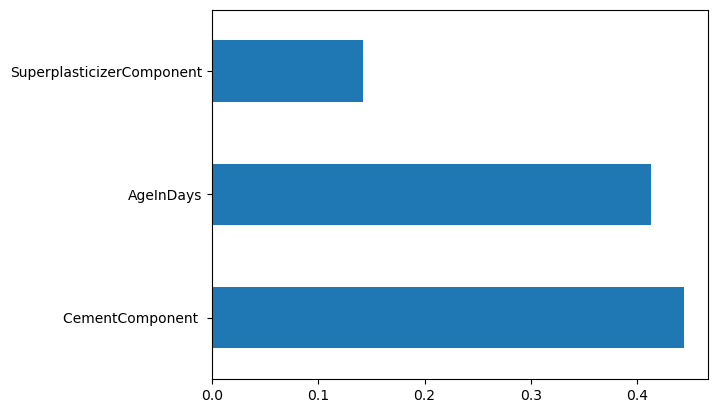

In [ ]:
%matplotlib inline
#create a new pd.Series object that contains feature importance scores calculated by the decision tree model (DT)
#The kind parameter is set to 'barh' to specify a horizontal bar chart.
feature_importances=pd.Series(DT.feature_importances_, index=PredictorsVar)
feature_importances.nlargest(3).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsVar)
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted '+TargetVar)]=np.round(prediction)
print(TestingDataResults[[TargetVar,'Predicted '+TargetVar]].head())

#calculate error of each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Strength']-TestingDataResults['Predicted Strength']))/TestingDataResults['Strength'])
#calculate mean absolute percentage error
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean accuracy on test data is', Accuracy)
print('Median accuracy on test data is', MedianAccuracy)

In this case AgeInDays has the highest contribution so this is chosen to be the root node.

In [ ]:
#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#run 10-fold cross validation
#pass the full sets of X and y that K-fold will split data automatically
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 77.86398343363729
###################################################################### Accuracy: 76.44175761048376
###################################################################### Accuracy: 75.81665325898922
###################################################################### Accuracy: 74.64158629593774
###################################################################### Accuracy: 79.55490125572155
###################################################################### Accuracy: 67.02753176072846
###################################################################### Accuracy: 59.901313628606836
###################################################################### Accuracy: 73.44729571874369
###################################################################### Accuracy: 71.01655066369082
###################################################################### Accuracy: 70.05683396609362
Accuracy 

### Plot decision tree
pip install graphviz
conda install graphviz
pip install pydotplus

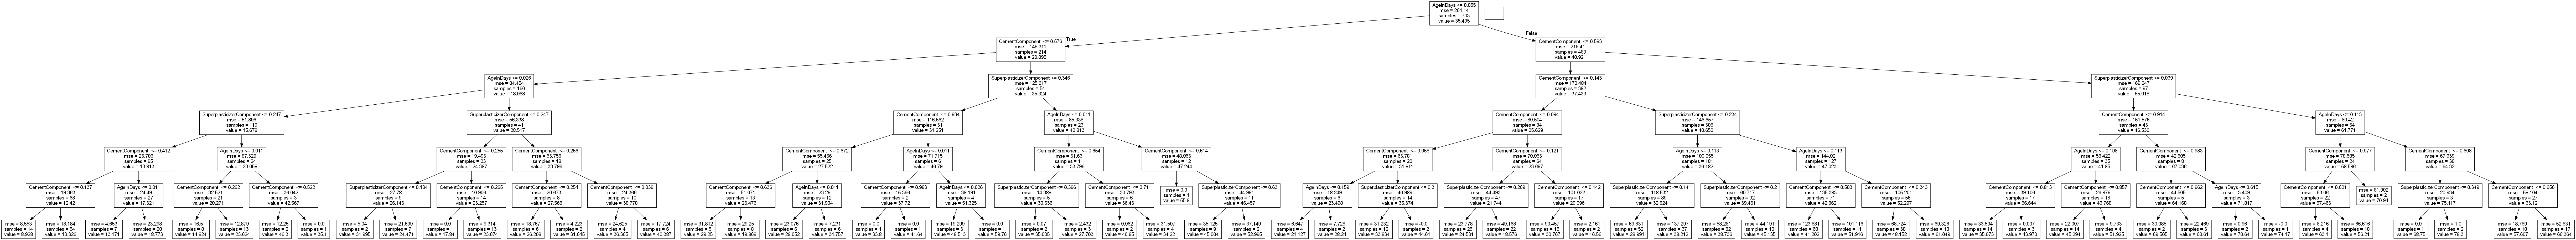

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create DOT data
dot_data=tree.export_graphviz(RegModel, out_file=None, feature_names=PredictorsVar, class_names=TargetVar)

#print(dot_data)

#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(), width=500,height=500)

### Random Forest

In [ ]:
#range of max_depth 2-10 and n_estimators 100-1000
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
print (RegModel)

RandomForestRegressor(criterion='mse', max_depth=5)


In [ ]:
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
print('Accuracy on training set', RF.score(X_train,y_train))

Accuracy on training set 0.8051928153112015


   Strength  Predicted Strength
0     15.05                18.0
1     14.64                13.0
2     59.00                51.0
3     50.24                54.0
4     21.91                29.0
Mean accuracy on test data is 75.12952699837487
Median accuracy on test data is 83.62569690371164


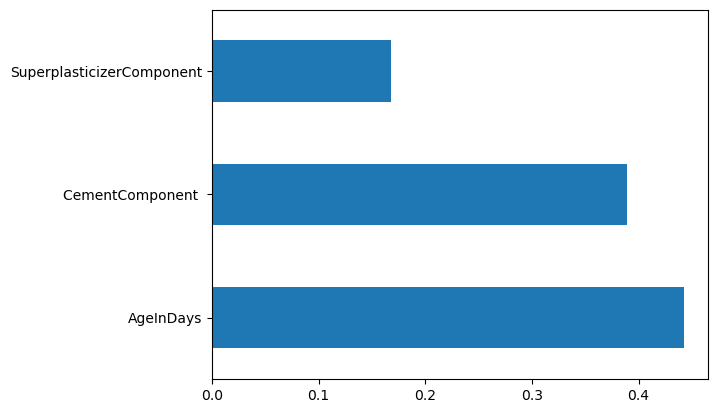

In [ ]:
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=PredictorsVar)
feature_importances.nlargest(3).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsVar)
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted '+TargetVar)]=np.round(prediction)
print(TestingDataResults[[TargetVar,'Predicted '+TargetVar]].head())

#calculate error of each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Strength']-TestingDataResults['Predicted Strength']))/TestingDataResults['Strength'])
#calculate mean absolute percentage error
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean accuracy on test data is', Accuracy)
print('Median accuracy on test data is', MedianAccuracy)

In [ ]:
#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#run 10-fold cross validation
#pass the full sets of X and y that K-fold will split data automatically
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 80.16266480936065
###################################################################### Accuracy: 75.006964810425
###################################################################### Accuracy: 82.57152860090618
###################################################################### Accuracy: 77.6103823417977
###################################################################### Accuracy: 81.29399759798827
###################################################################### Accuracy: 65.86589148264042
###################################################################### Accuracy: 62.360720507054765
###################################################################### Accuracy: 74.50606677387549
###################################################################### Accuracy: 71.39916119659047
###################################################################### Accuracy: 69.88770599347185
Accuracy val

### Plotting one of the Decision Trees in Random Forest

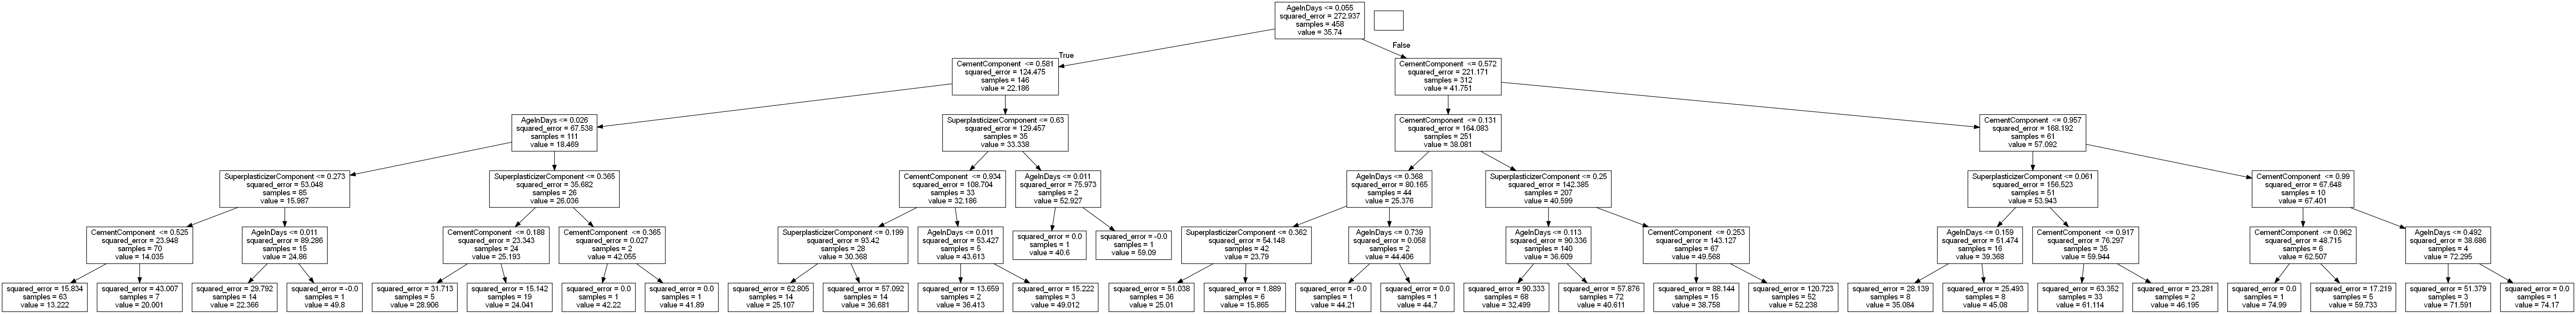

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

#create DOT data for the 6th Decision Tree in Random Forest
dot_data=tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=PredictorsVar, class_names=TargetVar)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=1000,height=1000)

## AdaBoost

In [ ]:
#boosting of multiple Decision Trees
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#max_depth=10 as the weak learner
#learning_rate is the contribution of each weak learner to the final prediction (has to determined through experimentation or cross-validation)
DTR=DecisionTreeRegressor(max_depth=10)
RegModel=AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)


In [ ]:
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
print('Accuracy on training set', AB.score(X_train,y_train))

Accuracy on training set 0.9767011896613852


<AxesSubplot:>

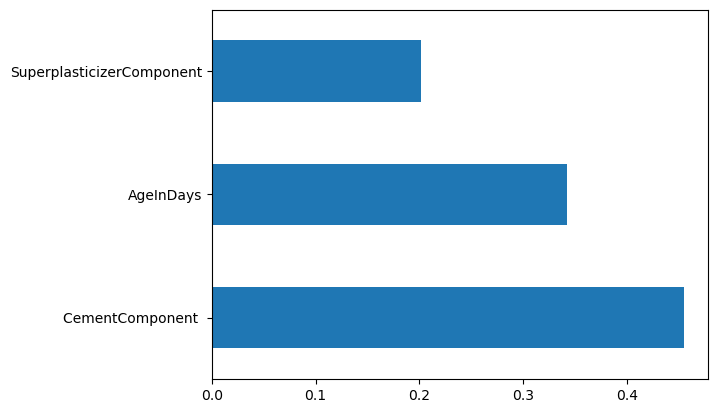

In [ ]:
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=PredictorsVar)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsVar)
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted '+TargetVar)]=np.round(prediction)

print(TestingDataResults[[TargetVar,'Predicted '+TargetVar]].head())

TestingDataResults['APE']=100 * ((abs(TestingDataResults['Strength']-TestingDataResults['Predicted Strength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean accuracy on test data is', Accuracy)
print('Median accuracy on test data is', MedianAccuracy)


   Strength  Predicted Strength
0     53.96                36.0
1     14.94                26.0
2     39.16                24.0
3     21.91                24.0
4     49.77                37.0
Mean accuracy on test data is 69.73331917198864
Median accuracy on test data is 79.80268316699846


In [ ]:
#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#run 10-fold cross validation
#pass the full sets of X and y that K-fold will split data automatically
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 78.22143149391383
###################################################################### Accuracy: 79.09484463594333
###################################################################### Accuracy: 80.09772566867127
###################################################################### Accuracy: 76.50971838157206
###################################################################### Accuracy: 79.44919543590332
###################################################################### Accuracy: 65.78342401740488
###################################################################### Accuracy: 69.56628699983995
###################################################################### Accuracy: 78.8858951829618
###################################################################### Accuracy: 85.8086155605369
###################################################################### Accuracy: 88.64690146167055
Accuracy val

#### Plotting one of the Decision trees from Adaboost

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.833872 to fit

(process:13800): GLib-GIO-WARNING **: 03:08:07.331: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:13800): GLib-GIO-WARNING **: 03:08:07.914: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.25.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs



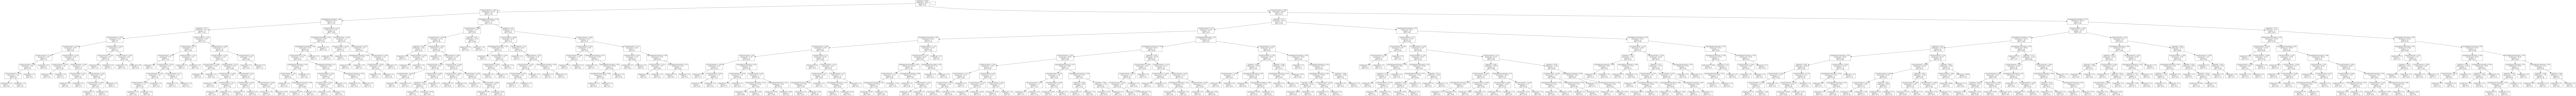

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=PredictorsVar, class_names=TargetVar)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=5000,height=5000)

## XGBoost

In [ ]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')
print(RegModel)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
print('Accuracy on training set', AB.score(X_train,y_train))

Accuracy on training set 0.9767011896613852


<AxesSubplot:>

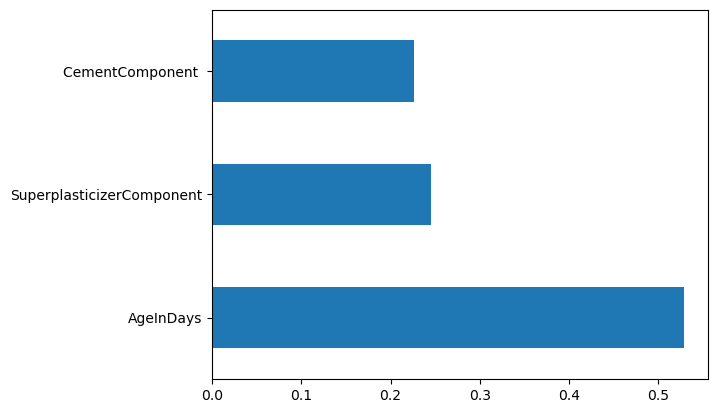

In [ ]:
feature_importances = pd.Series(XGB.feature_importances_, index=PredictorsVar)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
TestingDataResults=pd.DataFrame(data=X_test, columns=PredictorsVar)
TestingDataResults[TargetVar]=y_test
TestingDataResults[('Predicted '+TargetVar)]=np.round(prediction)

print(TestingDataResults[[TargetVar,'Predicted '+TargetVar]].head())

TestingDataResults['APE']=100 * ((abs(TestingDataResults['Strength']-TestingDataResults['Predicted Strength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean accuracy on test data is', Accuracy)
print('Median accuracy on test data is', MedianAccuracy)

   Strength  Predicted Strength
0     15.05                15.0
1     14.64                10.0
2     59.00                51.0
3     50.24                49.0
4     21.91                33.0
Mean accuracy on test data is 79.12775661005307
Median accuracy on test data is 87.34326282840533


In [ ]:
#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#run 10-fold cross validation
#pass the full sets of X and y that K-fold will split data automatically
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 80.95747304262903
###################################################################### Accuracy: 79.44667284425097
###################################################################### Accuracy: 81.06024257112458
###################################################################### Accuracy: 79.06216838757591
###################################################################### Accuracy: 79.16989358555224
###################################################################### Accuracy: 63.53527244614975
###################################################################### Accuracy: 66.60210245170174
###################################################################### Accuracy: 79.61023286519321
###################################################################### Accuracy: 81.09753627618122
###################################################################### Accuracy: 83.16354586536771
Accuracy v

#### Plotting a single Decision Tree 

<AxesSubplot:>

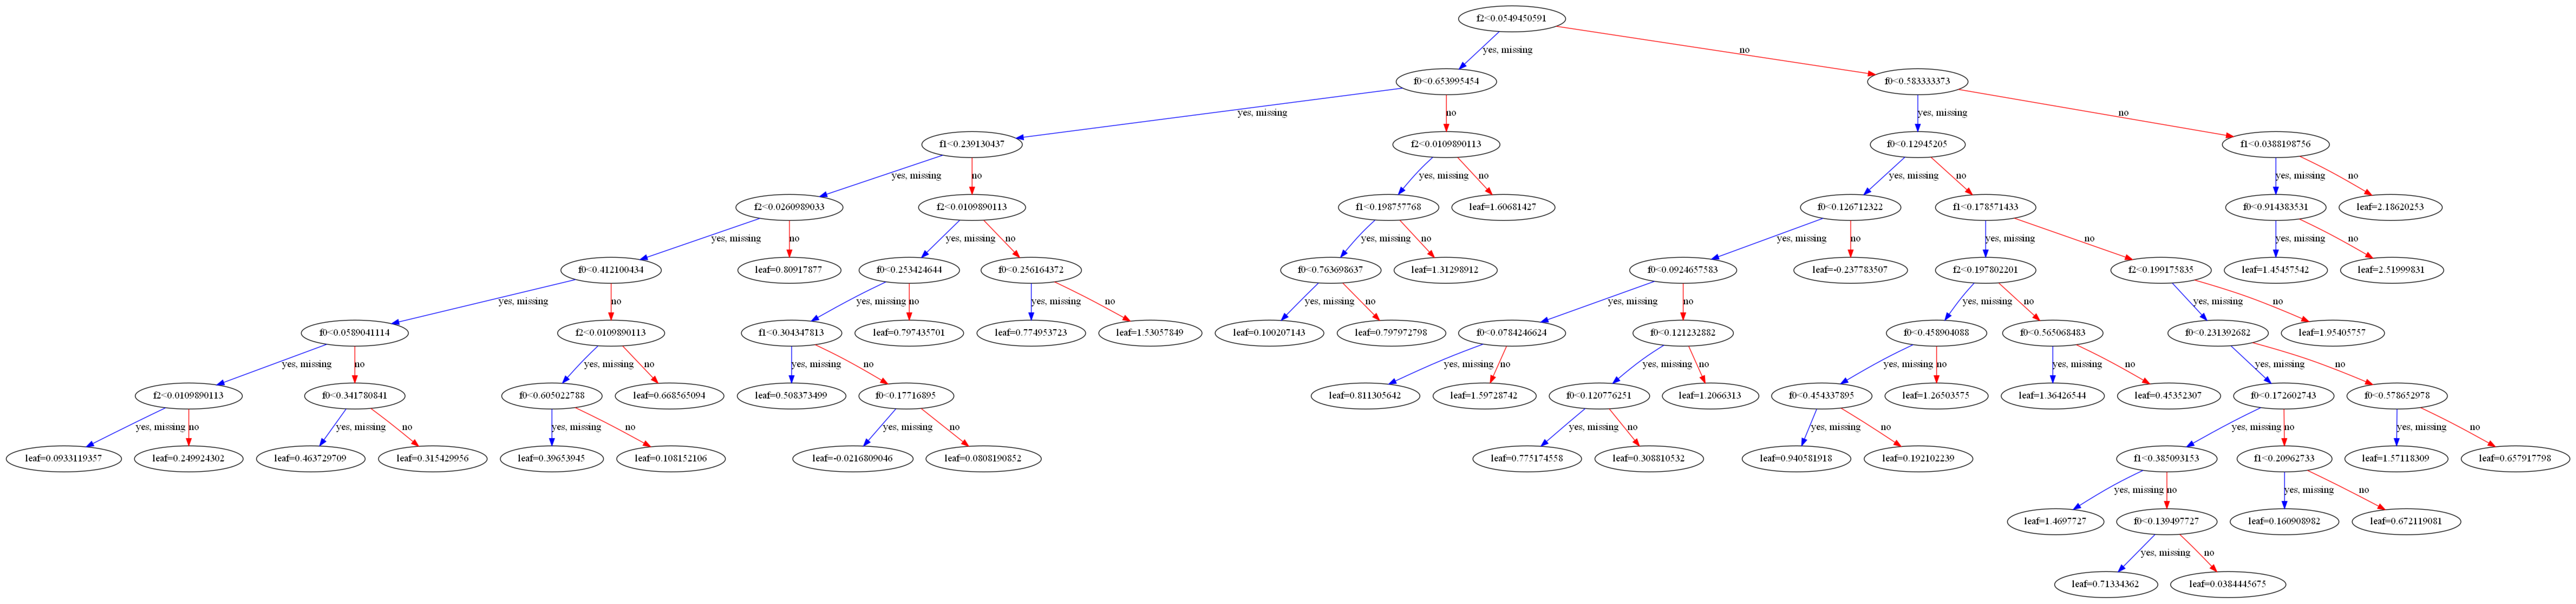

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)

## ANN

(1005, 3)
(1005,)
10/10 [==============================] - 0s 2ms/step
R2 Value: 0.7423035709324645


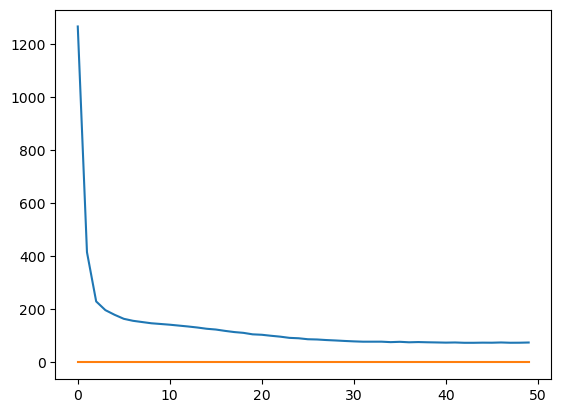

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

TargetVar='Strength'

Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML_numeric[PredictorsVar].values
y=DataForML_numeric[TargetVar].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model on the training data
his = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Value:", r2)

plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])

In [ ]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define Keras model as a function that returns a compiled model
def create_model():
    model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    return model

# Create a KerasRegressor object from Keras model function
keras_regressor = KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

print(keras_regressor)

#define function to calculate accuracy
def Accuracy_Score (orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

#custom Scoring MAPE calculation
#create a custom scorer object that uses Accuracy_Score function
#greater_is_better parameter in make_scorer specifies a higher score is better
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Use cross_val_score() to evaluate the model with 10-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(keras_regressor, X, y, cv=10, scoring=custom_Scoring)
print(scores)
print('Final Average Accuracy of the model:', round(scores.mean(),2))

###################################################################### Accuracy: 80.07841534279858
###################################################################### Accuracy: 78.73483763180941
###################################################################### Accuracy: 86.13825808162053
###################################################################### Accuracy: 77.90901022991501
###################################################################### Accuracy: 80.22949771265672
###################################################################### Accuracy: 72.61434852258294
###################################################################### Accuracy: 71.36144014616035
###################################################################### Accuracy: 70.26834175113382
###################################################################### Accuracy: 65.36386341467394
###################################################################### Accuracy: 66.73628374192641
[80.078415

## Deployment of the Model
in this case we are choosing AdaBoost and following the steps below:
1. Train the model with 100% data
2. Save the model as serialised file that can be stored anywhere
3. Create a python function to take input and return prediction

In this data, the most important predictor variables are 'CementComponent ', 'SuperplasticizerComponent', and 'AgeInDays'.

In [ ]:
TargetVar='Strength'

Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML_numeric[PredictorsVar].values
y=DataForML_numeric[TargetVar].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1005, 3)
(1005,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('Accuracy values for 10-fold Cross Validation:',Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###################################################################### Accuracy: 78.47831274402488
###################################################################### Accuracy: 78.90958140115362
###################################################################### Accuracy: 80.31013928409368
###################################################################### Accuracy: 76.42316101320775
###################################################################### Accuracy: 79.83153695648495
###################################################################### Accuracy: 65.95245031591176
###################################################################### Accuracy: 69.47584653656085
###################################################################### Accuracy: 78.71596392070495
###################################################################### Accuracy: 85.98201526110863
###################################################################### Accuracy: 88.63167602751959
Accuracy v

In [ ]:
#train the model on 100% data
Final_ADABOOST_Model=RegModel.fit(X,y)

In [ ]:
import pickle
import os

#save the Python objects as serialized files can be done using pickle library
#save the Final ZomatoStrengthModel
with open('Final_ADABOOST_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_ADABOOST_Model, fileWriteStream)
    #close the filestream!!!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\cherrychan9898


In [ ]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
#if standardisation/normalisation was done, same must be done for new input

    #append new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    #generate dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    #maintain the same order of columns as it was during the model training
    PredictorsVar=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']
    
    #generate the input values to the model
    X=InputData[PredictorsVar].values[0:Num_Inputs]
    
    #generate the standardised values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    #load the Function from pickle file
    import pickle
    with open('Final_ADABOOST_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        #close the filestream
        fileReadStream.close()
        
    #generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [ ]:
#create new sample data
NewSampleData=pd.DataFrame(data=[[540,2.5,28], [332,2.5,270]],
columns=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays'])

print(NewSampleData)

   CementComponent   SuperplasticizerComponent  AgeInDays
0               540                        2.5         28
1               332                        2.5        270


In [ ]:
FunctionPredictResult(InputData=NewSampleData)

Prediction
0        71.0
1        50.0